# Osteoporosis Hypothesis Testing Project

### Introduction

In this project, Ι will be using a Kaggle Dataset to analyze Osteoporosis Medical Data. Specifically, I will use hypothesis testing to answer the following questions:
1. Is there an association between Alcohol Consumption and Osteoporosis?
2. Does osteoporosis affect younger people or older people more?

Data Source: Kaggle (https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis)

### Importing libraries

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

### Loading the data

In [2]:
df = pd.read_csv('osteoporosis.csv')

### Investigating the data

In [3]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [5]:
df.Age.describe()

count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: Age, dtype: float64

In [8]:
col = df.select_dtypes(exclude='int64').columns

for i in col:
    print(i + ":")
    print(df[i].value_counts())
    print()

Gender:
Male      992
Female    966
Name: Gender, dtype: int64

Hormonal Changes:
Normal            981
Postmenopausal    977
Name: Hormonal Changes, dtype: int64

Family History:
No     998
Yes    960
Name: Family History, dtype: int64

Race/Ethnicity:
African American    681
Caucasian           646
Asian               631
Name: Race/Ethnicity, dtype: int64

Body Weight:
Normal         1027
Underweight     931
Name: Body Weight, dtype: int64

Calcium Intake:
Low         1004
Adequate     954
Name: Calcium Intake, dtype: int64

Vitamin D Intake:
Sufficient      1011
Insufficient     947
Name: Vitamin D Intake, dtype: int64

Physical Activity:
Active       1021
Sedentary     937
Name: Physical Activity, dtype: int64

Smoking:
Yes    982
No     976
Name: Smoking, dtype: int64

Alcohol Consumption:
None        988
Moderate    970
Name: Alcohol Consumption, dtype: int64

Medical Conditions:
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: Medical Co

In [26]:
df.Osteoporosis.value_counts()

1    979
0    979
Name: Osteoporosis, dtype: int64

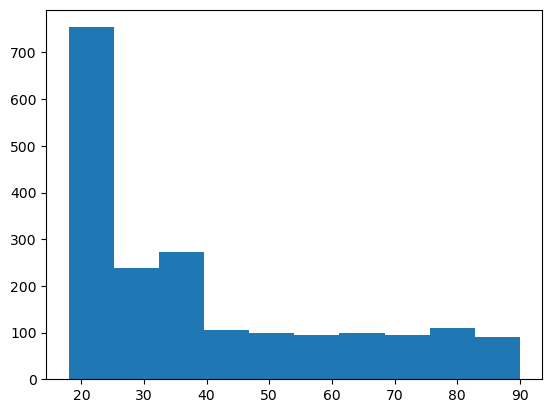

<Figure size 640x480 with 0 Axes>

In [45]:
plt.hist(df.Age)
plt.show()
plt.clf()

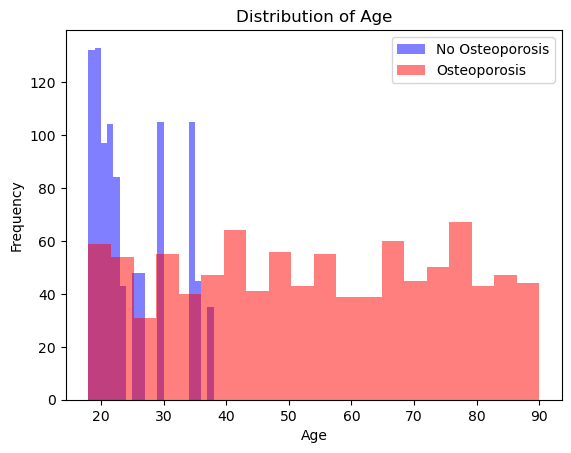

<Figure size 640x480 with 0 Axes>

In [30]:
plt.hist(df.Age[df.Osteoporosis == 0], color='blue', label='No Osteoporosis', alpha=0.5, bins=20)
plt.hist(df.Age[df.Osteoporosis == 1], color='red', label='Osteoporosis', alpha=0.5, bins=20)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.clf()

In the figure above, we notice that the distribution of ages of people without osteoporosis is concentrated around the left side of the graph, meaning that younger people are not as affected by osteoporosis. This will be tested using hypothesis testing techniques later on. 

### Analyzing the data

#### Question 1: Is there an association between Alcohol Consumption and Osteoporosis?

Here, I want to explore the relationship between two categorical variables, Alchohol Consumption and Osteoporosis. To do this, I will run a Chi-Square Test to see if there is a significant association between the variables. I will use a significance threshold of 0.05.

##### Chi-Square Test

In [33]:
contingency = pd.crosstab(df['Alcohol Consumption'], df.Osteoporosis)
contingency

Osteoporosis,0,1
Alcohol Consumption,,
Moderate,484,486
None,495,493


In [37]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print('p-value:', pval)

p-value: 0.963947598137716


Since the p-value is greater than our chosen significance threshold, we can conclude there is no statistically significant association between the two variables. Hence, Alcohol Consumption and Osteoporosis are not associated. 

#### Question 2: Does osteoporosis affect younger people or older people more?

In this second question, I want to investigate the association between a quantitative variable, age, and a binary categorical variable, Osteoporosis diagnosis. In order to do this, we need to calculate the average age for people with and without Osteoporosis and then use a two-sample t-test to determine the probability that the two average ages are significantly different. I will again use a significance threshold of 0.05 for this test.

##### Two-Sample T-Test

In [40]:
mean_age_osteo = df.Age[df.Osteoporosis == 1].mean()
print('Mean age of people with Osteoporosis', round(mean_age_osteo))

Mean age of people with Osteoporosis 54


In [41]:
mean_age_no_osteo = df.Age[df.Osteoporosis == 0].mean()
print('Mean age of people without Osteoporosis', round(mean_age_no_osteo))

Mean age of people without Osteoporosis 24


In [44]:
tstat, pval = ttest_ind(df.Age[df.Osteoporosis == 0], df.Age[df.Osteoporosis == 1])
print('p-value:', pval)

p-value: 2.83393260377111e-278


Since, the p-value is lower than the set singificant threshold, we conclude that older people are more affected by osteoporosis, as there is a statistically significant association between osteoporosis and age. This result aligns with our expectation, after plotting the distributions of the age for people with and without osteoporosis.

### Conclusion

To conclude, the above analysis produced the following results:
- There is no association between Alcohol Consumption and Osteoporosis
- Older people are more strongly affected by Osteoporosis than young people 

These results could be improved in terms of accuracy by both increasing the sample size and also balancing the ages across the whole range, instead of having a larger concentration in the low to mid 20s.